In [ ]:
# 수렴에서 벗어났는가 안벗어났는가 (벗어난 후 유지하는가?)
# 이평선에서 위에있는가 아래에 있는가
# 추세가 상승인가 하락인가 (평행 가드라인, 상승일때는 공구리, 하락일때는 천장) 20이평 60이평
# 고점(봉우리) 저점(골짜기) 를 연결하여 가드라인을 생성한다.
# 이평선끼리 벌어지고 있는가 좁아들고 있는가. (대게 좁아들면 횡보)
# 이평선의 각도가 있는가 (횡보 수평, 양의각 상승, 음의각 하락)

In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
Sequential = tf.keras.Sequential # 모델
Dense = tf.keras.layers.Dense # 뉴런
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
import sklearn as sl
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.rc('font', family='gulim') # NanumGothic  gulim NanumSquareRoundR

In [17]:
df = pd.DataFrame([{"localDateTime":"20240819090000","currentPrice":368.64,"openPrice":369.09,"highPrice":369.13,"lowPrice":368.56,"accumulatedTradingVolume":2359},{"localDateTime":"20240819090100","currentPrice":368.41,"openPrice":368.79,"highPrice":368.79,"lowPrice":368.2,"accumulatedTradingVolume":1179},{"localDateTime":"20240819090200","currentPrice":368.49,"openPrice":368.4,"highPrice":368.6,"lowPrice":367.93,"accumulatedTradingVolume":1188},{"localDateTime":"20240819090300","currentPrice":368.49,"openPrice":368.31,"highPrice":368.69,"lowPrice":368.12,"accumulatedTradingVolume":1216},{"localDateTime":"20240819090400","currentPrice":367.79,"openPrice":368.37,"highPrice":368.37,"lowPrice":367.77,"accumulatedTradingVolume":917},{"localDateTime":"20240819090500","currentPrice":367.67,"openPrice":367.76,"highPrice":367.86,"lowPrice":367.35,"accumulatedTradingVolume":1036},{"localDateTime":"20240819090600","currentPrice":367.8,"openPrice":367.68,"highPrice":367.96,"lowPrice":367.61,"accumulatedTradingVolume":833},{"localDateTime":"20240819090700","currentPrice":368.18,"openPrice":367.65,"highPrice":368.35,"lowPrice":367.65,"accumulatedTradingVolume":790},{"localDateTime":"20240819090800","currentPrice":367.83,"openPrice":368.19,"highPrice":368.34,"lowPrice":367.51,"accumulatedTradingVolume":1117},{"localDateTime":"20240819090900","currentPrice":367.92,"openPrice":367.97,"highPrice":368.06,"lowPrice":367.66,"accumulatedTradingVolume":765},{"localDateTime":"20240819091000","currentPrice":367.96,"openPrice":367.94,"highPrice":368.19,"lowPrice":367.8,"accumulatedTradingVolume":1000},{"localDateTime":"20240819091100","currentPrice":368.04,"openPrice":368.1,"highPrice":368.24,"lowPrice":367.96,"accumulatedTradingVolume":685},{"localDateTime":"20240819091200","currentPrice":367.84,"openPrice":368.02,"highPrice":368.19,"lowPrice":367.66,"accumulatedTradingVolume":905},{"localDateTime":"20240819091300","currentPrice":367.98,"openPrice":367.84,"highPrice":368.09,"lowPrice":367.68,"accumulatedTradingVolume":897},{"localDateTime":"20240819091400","currentPrice":368.18,"openPrice":368.12,"highPrice":368.23,"lowPrice":367.94,"accumulatedTradingVolume":653},{"localDateTime":"20240819091500","currentPrice":368.35,"openPrice":368.21,"highPrice":368.41,"lowPrice":368.04,"accumulatedTradingVolume":737},{"localDateTime":"20240819091600","currentPrice":368.31,"openPrice":368.35,"highPrice":368.47,"lowPrice":368.16,"accumulatedTradingVolume":728},{"localDateTime":"20240819091700","currentPrice":368.38,"openPrice":368.41,"highPrice":368.45,"lowPrice":368.2,"accumulatedTradingVolume":656},{"localDateTime":"20240819091800","currentPrice":368.08,"openPrice":368.26,"highPrice":368.52,"lowPrice":368.08,"accumulatedTradingVolume":676},{"localDateTime":"20240819091900","currentPrice":368.23,"openPrice":368.24,"highPrice":368.33,"lowPrice":368.03,"accumulatedTradingVolume":482},{"localDateTime":"20240819092000","currentPrice":368.35,"openPrice":368.24,"highPrice":368.44,"lowPrice":368.08,"accumulatedTradingVolume":486},{"localDateTime":"20240819092100","currentPrice":368.38,"openPrice":368.36,"highPrice":368.58,"lowPrice":368.27,"accumulatedTradingVolume":561},{"localDateTime":"20240819092200","currentPrice":368.62,"openPrice":368.5,"highPrice":368.64,"lowPrice":368.34,"accumulatedTradingVolume":356},{"localDateTime":"20240819092300","currentPrice":368.47,"openPrice":368.64,"highPrice":368.71,"lowPrice":368.37,"accumulatedTradingVolume":435},{"localDateTime":"20240819092400","currentPrice":368.66,"openPrice":368.6,"highPrice":368.75,"lowPrice":368.42,"accumulatedTradingVolume":462},{"localDateTime":"20240819092500","currentPrice":368.77,"openPrice":368.8,"highPrice":368.81,"lowPrice":368.59,"accumulatedTradingVolume":464},{"localDateTime":"20240819092600","currentPrice":368.55,"openPrice":368.77,"highPrice":368.79,"lowPrice":368.43,"accumulatedTradingVolume":498},{"localDateTime":"20240819092700","currentPrice":368.41,"openPrice":368.58,"highPrice":368.58,"lowPrice":368.23,"accumulatedTradingVolume":452},{"localDateTime":"20240819092800","currentPrice":368.45,"openPrice":368.36,"highPrice":368.49,"lowPrice":368.23,"accumulatedTradingVolume":525},{"localDateTime":"20240819092900","currentPrice":368.55,"openPrice":368.44,"highPrice":368.62,"lowPrice":368.31,"accumulatedTradingVolume":607},{"localDateTime":"20240819093000","currentPrice":368.5,"openPrice":368.62,"highPrice":368.71,"lowPrice":368.47,"accumulatedTradingVolume":624},{"localDateTime":"20240819093100","currentPrice":368.38,"openPrice":368.52,"highPrice":368.69,"lowPrice":368.37,"accumulatedTradingVolume":467},{"localDateTime":"20240819093200","currentPrice":368.26,"openPrice":368.51,"highPrice":368.53,"lowPrice":368.23,"accumulatedTradingVolume":405},{"localDateTime":"20240819093300","currentPrice":368.09,"openPrice":368.26,"highPrice":368.4,"lowPrice":367.96,"accumulatedTradingVolume":622},{"localDateTime":"20240819093400","currentPrice":367.98,"openPrice":368.11,"highPrice":368.11,"lowPrice":367.78,"accumulatedTradingVolume":662},{"localDateTime":"20240819093500","currentPrice":367.7,"openPrice":367.97,"highPrice":367.99,"lowPrice":367.66,"accumulatedTradingVolume":412},{"localDateTime":"20240819093600","currentPrice":367.94,"openPrice":367.82,"highPrice":367.97,"lowPrice":367.7,"accumulatedTradingVolume":446},{"localDateTime":"20240819093700","currentPrice":367.92,"openPrice":367.94,"highPrice":367.96,"lowPrice":367.76,"accumulatedTradingVolume":304},{"localDateTime":"20240819093800","currentPrice":367.97,"openPrice":367.76,"highPrice":368.01,"lowPrice":367.72,"accumulatedTradingVolume":348},{"localDateTime":"20240819093900","currentPrice":368.05,"openPrice":367.86,"highPrice":368.11,"lowPrice":367.83,"accumulatedTradingVolume":291},{"localDateTime":"20240819094000","currentPrice":367.85,"openPrice":368.07,"highPrice":368.13,"lowPrice":367.84,"accumulatedTradingVolume":339},{"localDateTime":"20240819094100","currentPrice":368.13,"openPrice":368.01,"highPrice":368.21,"lowPrice":367.87,"accumulatedTradingVolume":462},{"localDateTime":"20240819094200","currentPrice":368.06,"openPrice":368.14,"highPrice":368.17,"lowPrice":367.9,"accumulatedTradingVolume":365},{"localDateTime":"20240819094300","currentPrice":367.97,"openPrice":367.94,"highPrice":368.01,"lowPrice":367.78,"accumulatedTradingVolume":289},{"localDateTime":"20240819094400","currentPrice":367.91,"openPrice":367.84,"highPrice":367.99,"lowPrice":367.72,"accumulatedTradingVolume":572},{"localDateTime":"20240819094500","currentPrice":367.92,"openPrice":367.87,"highPrice":368.03,"lowPrice":367.81,"accumulatedTradingVolume":658},{"localDateTime":"20240819094600","currentPrice":367.86,"openPrice":367.96,"highPrice":367.99,"lowPrice":367.66,"accumulatedTradingVolume":545},{"localDateTime":"20240819094700","currentPrice":367.52,"openPrice":367.82,"highPrice":367.85,"lowPrice":367.52,"accumulatedTradingVolume":362},{"localDateTime":"20240819094800","currentPrice":367.9,"openPrice":367.55,"highPrice":367.9,"lowPrice":367.43,"accumulatedTradingVolume":496},{"localDateTime":"20240819094900","currentPrice":367.69,"openPrice":367.88,"highPrice":367.88,"lowPrice":367.5,"accumulatedTradingVolume":721},{"localDateTime":"20240819095000","currentPrice":367.52,"openPrice":367.69,"highPrice":367.72,"lowPrice":367.44,"accumulatedTradingVolume":455},{"localDateTime":"20240819095100","currentPrice":368.14,"openPrice":367.51,"highPrice":368.15,"lowPrice":367.51,"accumulatedTradingVolume":516},{"localDateTime":"20240819095200","currentPrice":368.09,"openPrice":368.0,"highPrice":368.17,"lowPrice":367.9,"accumulatedTradingVolume":304},{"localDateTime":"20240819095300","currentPrice":367.9,"openPrice":368.13,"highPrice":368.2,"lowPrice":367.85,"accumulatedTradingVolume":267},{"localDateTime":"20240819095400","currentPrice":367.82,"openPrice":367.88,"highPrice":368.03,"lowPrice":367.62,"accumulatedTradingVolume":331},{"localDateTime":"20240819095500","currentPrice":367.74,"openPrice":367.86,"highPrice":367.86,"lowPrice":367.56,"accumulatedTradingVolume":306},{"localDateTime":"20240819095600","currentPrice":367.47,"openPrice":367.71,"highPrice":367.72,"lowPrice":367.42,"accumulatedTradingVolume":387},{"localDateTime":"20240819095700","currentPrice":367.59,"openPrice":367.46,"highPrice":367.75,"lowPrice":367.39,"accumulatedTradingVolume":305},{"localDateTime":"20240819095800","currentPrice":367.75,"openPrice":367.6,"highPrice":367.83,"lowPrice":367.58,"accumulatedTradingVolume":206},{"localDateTime":"20240819095900","currentPrice":367.79,"openPrice":367.78,"highPrice":367.83,"lowPrice":367.58,"accumulatedTradingVolume":211},{"localDateTime":"20240819100000","currentPrice":367.76,"openPrice":367.67,"highPrice":367.86,"lowPrice":367.58,"accumulatedTradingVolume":222},{"localDateTime":"20240819100100","currentPrice":367.78,"openPrice":367.64,"highPrice":367.89,"lowPrice":367.63,"accumulatedTradingVolume":225},{"localDateTime":"20240819100200","currentPrice":367.66,"openPrice":367.75,"highPrice":367.82,"lowPrice":367.43,"accumulatedTradingVolume":352},{"localDateTime":"20240819100300","currentPrice":367.6,"openPrice":367.65,"highPrice":367.75,"lowPrice":367.48,"accumulatedTradingVolume":249},{"localDateTime":"20240819100400","currentPrice":367.37,"openPrice":367.6,"highPrice":367.6,"lowPrice":367.25,"accumulatedTradingVolume":313},{"localDateTime":"20240819100500","currentPrice":366.94,"openPrice":367.36,"highPrice":367.38,"lowPrice":366.86,"accumulatedTradingVolume":350},{"localDateTime":"20240819100600","currentPrice":367.25,"openPrice":367.09,"highPrice":367.25,"lowPrice":366.91,"accumulatedTradingVolume":258},{"localDateTime":"20240819100700","currentPrice":367.31,"openPrice":367.14,"highPrice":367.39,"lowPrice":367.1,"accumulatedTradingVolume":213},{"localDateTime":"20240819100800","currentPrice":367.26,"openPrice":367.33,"highPrice":367.41,"lowPrice":367.1,"accumulatedTradingVolume":169},{"localDateTime":"20240819100900","currentPrice":367.26,"openPrice":367.26,"highPrice":367.48,"lowPrice":367.12,"accumulatedTradingVolume":252},{"localDateTime":"20240819101000","currentPrice":367.3,"openPrice":367.25,"highPrice":367.56,"lowPrice":367.11,"accumulatedTradingVolume":271},{"localDateTime":"20240819101100","currentPrice":367.35,"openPrice":367.32,"highPrice":367.52,"lowPrice":367.21,"accumulatedTradingVolume":162},{"localDateTime":"20240819101200","currentPrice":367.46,"openPrice":367.22,"highPrice":367.58,"lowPrice":367.21,"accumulatedTradingVolume":233},{"localDateTime":"20240819101300","currentPrice":367.5,"openPrice":367.33,"highPrice":367.67,"lowPrice":367.33,"accumulatedTradingVolume":202},{"localDateTime":"20240819101400","currentPrice":367.5,"openPrice":367.51,"highPrice":367.77,"lowPrice":367.49,"accumulatedTradingVolume":220},{"localDateTime":"20240819101500","currentPrice":367.29,"openPrice":367.53,"highPrice":367.65,"lowPrice":367.26,"accumulatedTradingVolume":391},{"localDateTime":"20240819101600","currentPrice":367.34,"openPrice":367.42,"highPrice":367.54,"lowPrice":367.27,"accumulatedTradingVolume":241},{"localDateTime":"20240819101700","currentPrice":367.31,"openPrice":367.48,"highPrice":367.56,"lowPrice":367.3,"accumulatedTradingVolume":238},{"localDateTime":"20240819101800","currentPrice":367.21,"openPrice":367.29,"highPrice":367.47,"lowPrice":367.19,"accumulatedTradingVolume":291},{"localDateTime":"20240819101900","currentPrice":367.19,"openPrice":367.22,"highPrice":367.25,"lowPrice":367.05,"accumulatedTradingVolume":212},{"localDateTime":"20240819102000","currentPrice":367.28,"openPrice":367.2,"highPrice":367.4,"lowPrice":367.15,"accumulatedTradingVolume":233},{"localDateTime":"20240819102100","currentPrice":367.28,"openPrice":367.31,"highPrice":367.34,"lowPrice":367.1,"accumulatedTradingVolume":204},{"localDateTime":"20240819102200","currentPrice":367.2,"openPrice":367.12,"highPrice":367.3,"lowPrice":367.03,"accumulatedTradingVolume":247},{"localDateTime":"20240819102300","currentPrice":367.09,"openPrice":367.05,"highPrice":367.21,"lowPrice":366.83,"accumulatedTradingVolume":325},{"localDateTime":"20240819102400","currentPrice":367.22,"openPrice":367.08,"highPrice":367.26,"lowPrice":366.88,"accumulatedTradingVolume":278},{"localDateTime":"20240819102500","currentPrice":366.87,"openPrice":367.19,"highPrice":367.24,"lowPrice":366.87,"accumulatedTradingVolume":198},{"localDateTime":"20240819102600","currentPrice":366.95,"openPrice":367.03,"highPrice":367.09,"lowPrice":366.79,"accumulatedTradingVolume":197},{"localDateTime":"20240819102700","currentPrice":366.89,"openPrice":366.96,"highPrice":367.04,"lowPrice":366.76,"accumulatedTradingVolume":224},{"localDateTime":"20240819102800","currentPrice":367.03,"openPrice":366.88,"highPrice":367.08,"lowPrice":366.81,"accumulatedTradingVolume":155},{"localDateTime":"20240819102900","currentPrice":366.99,"openPrice":367.02,"highPrice":367.09,"lowPrice":366.84,"accumulatedTradingVolume":141},{"localDateTime":"20240819103000","currentPrice":366.83,"openPrice":366.85,"highPrice":367.02,"lowPrice":366.81,"accumulatedTradingVolume":214},{"localDateTime":"20240819103100","currentPrice":367.11,"openPrice":367.0,"highPrice":367.11,"lowPrice":366.81,"accumulatedTradingVolume":146},{"localDateTime":"20240819103200","currentPrice":366.88,"openPrice":366.95,"highPrice":367.08,"lowPrice":366.85,"accumulatedTradingVolume":188},{"localDateTime":"20240819103300","currentPrice":367.01,"openPrice":366.88,"highPrice":367.11,"lowPrice":366.85,"accumulatedTradingVolume":143},{"localDateTime":"20240819103400","currentPrice":367.11,"openPrice":367.03,"highPrice":367.15,"lowPrice":366.84,"accumulatedTradingVolume":187},{"localDateTime":"20240819103500","currentPrice":367.01,"openPrice":367.1,"highPrice":367.1,"lowPrice":366.87,"accumulatedTradingVolume":175},{"localDateTime":"20240819103600","currentPrice":366.84,"openPrice":366.88,"highPrice":367.07,"lowPrice":366.83,"accumulatedTradingVolume":174},{"localDateTime":"20240819103700","currentPrice":366.83,"openPrice":366.97,"highPrice":367.0,"lowPrice":366.78,"accumulatedTradingVolume":202},{"localDateTime":"20240819103800","currentPrice":367.04,"openPrice":366.84,"highPrice":367.06,"lowPrice":366.83,"accumulatedTradingVolume":283},{"localDateTime":"20240819103900","currentPrice":366.87,"openPrice":366.91,"highPrice":367.07,"lowPrice":366.85,"accumulatedTradingVolume":182},{"localDateTime":"20240819104000","currentPrice":366.97,"openPrice":366.89,"highPrice":367.03,"lowPrice":366.77,"accumulatedTradingVolume":174},{"localDateTime":"20240819104100","currentPrice":366.98,"openPrice":366.93,"highPrice":367.08,"lowPrice":366.77,"accumulatedTradingVolume":162},{"localDateTime":"20240819104200","currentPrice":367.15,"openPrice":366.97,"highPrice":367.16,"lowPrice":366.83,"accumulatedTradingVolume":217},{"localDateTime":"20240819104300","currentPrice":367.0,"openPrice":367.0,"highPrice":367.17,"lowPrice":366.94,"accumulatedTradingVolume":143},{"localDateTime":"20240819104400","currentPrice":367.14,"openPrice":366.97,"highPrice":367.21,"lowPrice":366.96,"accumulatedTradingVolume":142},{"localDateTime":"20240819104500","currentPrice":367.01,"openPrice":367.18,"highPrice":367.21,"lowPrice":366.98,"accumulatedTradingVolume":145},{"localDateTime":"20240819104600","currentPrice":367.06,"openPrice":367.01,"highPrice":367.21,"lowPrice":366.99,"accumulatedTradingVolume":217},{"localDateTime":"20240819104700","currentPrice":367.26,"openPrice":367.06,"highPrice":367.28,"lowPrice":367.0,"accumulatedTradingVolume":228},{"localDateTime":"20240819104800","currentPrice":367.19,"openPrice":367.27,"highPrice":367.27,"lowPrice":367.05,"accumulatedTradingVolume":331},{"localDateTime":"20240819104900","currentPrice":367.19,"openPrice":367.34,"highPrice":367.41,"lowPrice":367.16,"accumulatedTradingVolume":203},{"localDateTime":"20240819105000","currentPrice":367.14,"openPrice":367.36,"highPrice":367.36,"lowPrice":367.12,"accumulatedTradingVolume":188},{"localDateTime":"20240819105100","currentPrice":367.13,"openPrice":367.29,"highPrice":367.35,"lowPrice":367.1,"accumulatedTradingVolume":187},{"localDateTime":"20240819105200","currentPrice":367.06,"openPrice":367.11,"highPrice":367.26,"lowPrice":367.06,"accumulatedTradingVolume":205},{"localDateTime":"20240819105300","currentPrice":367.0,"openPrice":367.06,"highPrice":367.24,"lowPrice":367.0,"accumulatedTradingVolume":147},{"localDateTime":"20240819105400","currentPrice":367.03,"openPrice":367.17,"highPrice":367.22,"lowPrice":366.99,"accumulatedTradingVolume":163},{"localDateTime":"20240819105500","currentPrice":367.12,"openPrice":367.04,"highPrice":367.32,"lowPrice":367.01,"accumulatedTradingVolume":135},{"localDateTime":"20240819105600","currentPrice":367.3,"openPrice":367.3,"highPrice":367.45,"lowPrice":367.13,"accumulatedTradingVolume":193},{"localDateTime":"20240819105700","currentPrice":367.37,"openPrice":367.31,"highPrice":367.41,"lowPrice":367.15,"accumulatedTradingVolume":138},{"localDateTime":"20240819105800","currentPrice":367.42,"openPrice":367.37,"highPrice":367.46,"lowPrice":367.21,"accumulatedTradingVolume":133},{"localDateTime":"20240819105900","currentPrice":367.64,"openPrice":367.26,"highPrice":367.66,"lowPrice":367.25,"accumulatedTradingVolume":159},{"localDateTime":"20240819110000","currentPrice":367.83,"openPrice":367.62,"highPrice":367.84,"lowPrice":367.5,"accumulatedTradingVolume":212},{"localDateTime":"20240819110100","currentPrice":367.92,"openPrice":367.83,"highPrice":367.98,"lowPrice":367.71,"accumulatedTradingVolume":126},{"localDateTime":"20240819110200","currentPrice":367.91,"openPrice":367.97,"highPrice":367.97,"lowPrice":367.74,"accumulatedTradingVolume":138},{"localDateTime":"20240819110300","currentPrice":367.73,"openPrice":367.93,"highPrice":368.07,"lowPrice":367.67,"accumulatedTradingVolume":205},{"localDateTime":"20240819110400","currentPrice":367.82,"openPrice":367.88,"highPrice":367.88,"lowPrice":367.65,"accumulatedTradingVolume":127},{"localDateTime":"20240819110500","currentPrice":367.87,"openPrice":367.8,"highPrice":367.91,"lowPrice":367.65,"accumulatedTradingVolume":134},{"localDateTime":"20240819110600","currentPrice":367.8,"openPrice":367.88,"highPrice":367.95,"lowPrice":367.63,"accumulatedTradingVolume":137},{"localDateTime":"20240819110700","currentPrice":367.83,"openPrice":367.83,"highPrice":367.86,"lowPrice":367.63,"accumulatedTradingVolume":105},{"localDateTime":"20240819110800","currentPrice":367.85,"openPrice":367.8,"highPrice":367.87,"lowPrice":367.61,"accumulatedTradingVolume":131},{"localDateTime":"20240819110900","currentPrice":367.67,"openPrice":367.83,"highPrice":367.84,"lowPrice":367.61,"accumulatedTradingVolume":106},{"localDateTime":"20240819111000","currentPrice":367.8,"openPrice":367.85,"highPrice":367.85,"lowPrice":367.59,"accumulatedTradingVolume":108},{"localDateTime":"20240819111100","currentPrice":367.9,"openPrice":367.71,"highPrice":367.93,"lowPrice":367.66,"accumulatedTradingVolume":141},{"localDateTime":"20240819111200","currentPrice":367.92,"openPrice":367.9,"highPrice":368.06,"lowPrice":367.75,"accumulatedTradingVolume":185},{"localDateTime":"20240819111300","currentPrice":367.9,"openPrice":367.87,"highPrice":367.93,"lowPrice":367.69,"accumulatedTradingVolume":154},{"localDateTime":"20240819111400","currentPrice":367.61,"openPrice":367.88,"highPrice":367.89,"lowPrice":367.6,"accumulatedTradingVolume":209},{"localDateTime":"20240819111500","currentPrice":367.5,"openPrice":367.76,"highPrice":367.78,"lowPrice":367.44,"accumulatedTradingVolume":202},{"localDateTime":"20240819111600","currentPrice":367.28,"openPrice":367.44,"highPrice":367.67,"lowPrice":367.28,"accumulatedTradingVolume":278},{"localDateTime":"20240819111700","currentPrice":367.47,"openPrice":367.43,"highPrice":367.61,"lowPrice":367.31,"accumulatedTradingVolume":165},{"localDateTime":"20240819111800","currentPrice":367.68,"openPrice":367.59,"highPrice":367.68,"lowPrice":367.43,"accumulatedTradingVolume":359},{"localDateTime":"20240819111900","currentPrice":367.53,"openPrice":367.55,"highPrice":367.74,"lowPrice":367.5,"accumulatedTradingVolume":205},{"localDateTime":"20240819112000","currentPrice":367.79,"openPrice":367.53,"highPrice":367.91,"lowPrice":367.53,"accumulatedTradingVolume":228},{"localDateTime":"20240819112100","currentPrice":367.73,"openPrice":367.77,"highPrice":367.92,"lowPrice":367.56,"accumulatedTradingVolume":309},{"localDateTime":"20240819112200","currentPrice":367.74,"openPrice":367.89,"highPrice":367.91,"lowPrice":367.7,"accumulatedTradingVolume":156},{"localDateTime":"20240819112300","currentPrice":367.81,"openPrice":367.89,"highPrice":368.0,"lowPrice":367.73,"accumulatedTradingVolume":142},{"localDateTime":"20240819112400","currentPrice":367.73,"openPrice":367.81,"highPrice":367.96,"lowPrice":367.71,"accumulatedTradingVolume":110},{"localDateTime":"20240819112500","currentPrice":367.91,"openPrice":367.74,"highPrice":367.95,"lowPrice":367.72,"accumulatedTradingVolume":151},{"localDateTime":"20240819112600","currentPrice":367.78,"openPrice":367.9,"highPrice":367.94,"lowPrice":367.73,"accumulatedTradingVolume":149},{"localDateTime":"20240819112700","currentPrice":367.93,"openPrice":367.78,"highPrice":367.96,"lowPrice":367.69,"accumulatedTradingVolume":235},{"localDateTime":"20240819112800","currentPrice":367.88,"openPrice":367.75,"highPrice":367.95,"lowPrice":367.7,"accumulatedTradingVolume":132},{"localDateTime":"20240819112900","currentPrice":367.72,"openPrice":367.74,"highPrice":367.77,"lowPrice":367.56,"accumulatedTradingVolume":193},{"localDateTime":"20240819113000","currentPrice":367.53,"openPrice":367.71,"highPrice":367.79,"lowPrice":367.53,"accumulatedTradingVolume":163},{"localDateTime":"20240819113100","currentPrice":367.67,"openPrice":367.73,"highPrice":367.73,"lowPrice":367.52,"accumulatedTradingVolume":126},{"localDateTime":"20240819113200","currentPrice":367.7,"openPrice":367.5,"highPrice":367.74,"lowPrice":367.5,"accumulatedTradingVolume":159},{"localDateTime":"20240819113300","currentPrice":367.67,"openPrice":367.69,"highPrice":367.72,"lowPrice":367.48,"accumulatedTradingVolume":123},{"localDateTime":"20240819113400","currentPrice":367.48,"openPrice":367.65,"highPrice":367.68,"lowPrice":367.43,"accumulatedTradingVolume":147},{"localDateTime":"20240819113500","currentPrice":367.42,"openPrice":367.49,"highPrice":367.63,"lowPrice":367.4,"accumulatedTradingVolume":119},{"localDateTime":"20240819113600","currentPrice":367.38,"openPrice":367.41,"highPrice":367.59,"lowPrice":367.36,"accumulatedTradingVolume":154},{"localDateTime":"20240819113700","currentPrice":367.46,"openPrice":367.52,"highPrice":367.52,"lowPrice":367.3,"accumulatedTradingVolume":125},{"localDateTime":"20240819113800","currentPrice":367.28,"openPrice":367.3,"highPrice":367.47,"lowPrice":367.26,"accumulatedTradingVolume":92},{"localDateTime":"20240819113900","currentPrice":367.3,"openPrice":367.28,"highPrice":367.46,"lowPrice":367.24,"accumulatedTradingVolume":118},{"localDateTime":"20240819114000","currentPrice":367.32,"openPrice":367.43,"highPrice":367.48,"lowPrice":367.25,"accumulatedTradingVolume":150},{"localDateTime":"20240819114100","currentPrice":367.31,"openPrice":367.32,"highPrice":367.49,"lowPrice":367.26,"accumulatedTradingVolume":150},{"localDateTime":"20240819114200","currentPrice":367.42,"openPrice":367.31,"highPrice":367.46,"lowPrice":367.26,"accumulatedTradingVolume":180},{"localDateTime":"20240819114300","currentPrice":367.38,"openPrice":367.41,"highPrice":367.56,"lowPrice":367.27,"accumulatedTradingVolume":148},{"localDateTime":"20240819114400","currentPrice":367.51,"openPrice":367.35,"highPrice":367.55,"lowPrice":367.29,"accumulatedTradingVolume":105},{"localDateTime":"20240819114500","currentPrice":367.56,"openPrice":367.35,"highPrice":367.56,"lowPrice":367.29,"accumulatedTradingVolume":139},{"localDateTime":"20240819114600","currentPrice":367.56,"openPrice":367.55,"highPrice":367.7,"lowPrice":367.37,"accumulatedTradingVolume":178},{"localDateTime":"20240819114700","currentPrice":367.66,"openPrice":367.57,"highPrice":367.79,"lowPrice":367.53,"accumulatedTradingVolume":119},{"localDateTime":"20240819114800","currentPrice":367.76,"openPrice":367.63,"highPrice":367.76,"lowPrice":367.56,"accumulatedTradingVolume":153},{"localDateTime":"20240819114900","currentPrice":367.6,"openPrice":367.62,"highPrice":367.78,"lowPrice":367.54,"accumulatedTradingVolume":131},{"localDateTime":"20240819115000","currentPrice":367.67,"openPrice":367.75,"highPrice":367.85,"lowPrice":367.6,"accumulatedTradingVolume":124},{"localDateTime":"20240819115100","currentPrice":367.82,"openPrice":367.63,"highPrice":367.89,"lowPrice":367.62,"accumulatedTradingVolume":99},{"localDateTime":"20240819115200","currentPrice":367.86,"openPrice":367.83,"highPrice":367.87,"lowPrice":367.67,"accumulatedTradingVolume":150},{"localDateTime":"20240819115300","currentPrice":367.74,"openPrice":367.88,"highPrice":367.93,"lowPrice":367.71,"accumulatedTradingVolume":161},{"localDateTime":"20240819115400","currentPrice":367.76,"openPrice":367.73,"highPrice":367.94,"lowPrice":367.7,"accumulatedTradingVolume":146},{"localDateTime":"20240819115500","currentPrice":367.91,"openPrice":367.76,"highPrice":367.98,"lowPrice":367.71,"accumulatedTradingVolume":94},{"localDateTime":"20240819115600","currentPrice":367.91,"openPrice":367.93,"highPrice":367.95,"lowPrice":367.71,"accumulatedTradingVolume":105},{"localDateTime":"20240819115700","currentPrice":367.71,"openPrice":367.9,"highPrice":367.96,"lowPrice":367.69,"accumulatedTradingVolume":104},{"localDateTime":"20240819115800","currentPrice":367.87,"openPrice":367.88,"highPrice":367.94,"lowPrice":367.71,"accumulatedTradingVolume":162},{"localDateTime":"20240819115900","currentPrice":367.84,"openPrice":367.87,"highPrice":367.91,"lowPrice":367.67,"accumulatedTradingVolume":151},{"localDateTime":"20240819120000","currentPrice":367.88,"openPrice":367.7,"highPrice":367.94,"lowPrice":367.68,"accumulatedTradingVolume":164},{"localDateTime":"20240819120100","currentPrice":367.82,"openPrice":367.89,"highPrice":367.97,"lowPrice":367.68,"accumulatedTradingVolume":141},{"localDateTime":"20240819120200","currentPrice":367.8,"openPrice":367.84,"highPrice":367.99,"lowPrice":367.72,"accumulatedTradingVolume":107},{"localDateTime":"20240819120300","currentPrice":367.82,"openPrice":367.76,"highPrice":367.98,"lowPrice":367.76,"accumulatedTradingVolume":139},{"localDateTime":"20240819120400","currentPrice":368.09,"openPrice":367.98,"highPrice":368.09,"lowPrice":367.81,"accumulatedTradingVolume":222},{"localDateTime":"20240819120500","currentPrice":367.8,"openPrice":368.06,"highPrice":368.06,"lowPrice":367.76,"accumulatedTradingVolume":132},{"localDateTime":"20240819120600","currentPrice":367.9,"openPrice":367.81,"highPrice":368.06,"lowPrice":367.81,"accumulatedTradingVolume":125},{"localDateTime":"20240819120700","currentPrice":367.79,"openPrice":367.91,"highPrice":368.06,"lowPrice":367.79,"accumulatedTradingVolume":156},{"localDateTime":"20240819120800","currentPrice":367.78,"openPrice":367.82,"highPrice":367.99,"lowPrice":367.76,"accumulatedTradingVolume":112},{"localDateTime":"20240819120900","currentPrice":367.87,"openPrice":367.81,"highPrice":368.02,"lowPrice":367.78,"accumulatedTradingVolume":84},{"localDateTime":"20240819121000","currentPrice":367.92,"openPrice":367.83,"highPrice":368.1,"lowPrice":367.83,"accumulatedTradingVolume":89},{"localDateTime":"20240819121100","currentPrice":368.01,"openPrice":367.92,"highPrice":368.07,"lowPrice":367.86,"accumulatedTradingVolume":121},{"localDateTime":"20240819121200","currentPrice":367.84,"openPrice":367.88,"highPrice":368.03,"lowPrice":367.78,"accumulatedTradingVolume":104},{"localDateTime":"20240819121300","currentPrice":367.89,"openPrice":367.96,"highPrice":368.04,"lowPrice":367.8,"accumulatedTradingVolume":72},{"localDateTime":"20240819121400","currentPrice":367.93,"openPrice":367.92,"highPrice":368.1,"lowPrice":367.85,"accumulatedTradingVolume":114},{"localDateTime":"20240819121500","currentPrice":367.85,"openPrice":367.91,"highPrice":368.08,"lowPrice":367.8,"accumulatedTradingVolume":100},{"localDateTime":"20240819121600","currentPrice":367.87,"openPrice":367.86,"highPrice":368.04,"lowPrice":367.81,"accumulatedTradingVolume":105},{"localDateTime":"20240819121700","currentPrice":368.02,"openPrice":368.0,"highPrice":368.03,"lowPrice":367.81,"accumulatedTradingVolume":95},{"localDateTime":"20240819121800","currentPrice":368.05,"openPrice":367.85,"highPrice":368.06,"lowPrice":367.82,"accumulatedTradingVolume":115},{"localDateTime":"20240819121900","currentPrice":367.85,"openPrice":368.06,"highPrice":368.09,"lowPrice":367.82,"accumulatedTradingVolume":138},{"localDateTime":"20240819122000","currentPrice":367.84,"openPrice":367.96,"highPrice":367.98,"lowPrice":367.74,"accumulatedTradingVolume":170},{"localDateTime":"20240819122100","currentPrice":367.81,"openPrice":367.98,"highPrice":368.02,"lowPrice":367.79,"accumulatedTradingVolume":153},{"localDateTime":"20240819122200","currentPrice":368.0,"openPrice":367.83,"highPrice":368.0,"lowPrice":367.77,"accumulatedTradingVolume":105},{"localDateTime":"20240819122300","currentPrice":367.99,"openPrice":368.02,"highPrice":368.04,"lowPrice":367.82,"accumulatedTradingVolume":156},{"localDateTime":"20240819122400","currentPrice":368.03,"openPrice":367.85,"highPrice":368.16,"lowPrice":367.83,"accumulatedTradingVolume":123},{"localDateTime":"20240819122500","currentPrice":368.14,"openPrice":367.98,"highPrice":368.14,"lowPrice":367.9,"accumulatedTradingVolume":117},{"localDateTime":"20240819122600","currentPrice":368.2,"openPrice":367.97,"highPrice":368.2,"lowPrice":367.9,"accumulatedTradingVolume":147},{"localDateTime":"20240819122700","currentPrice":368.08,"openPrice":368.22,"highPrice":368.22,"lowPrice":368.0,"accumulatedTradingVolume":98},{"localDateTime":"20240819122800","currentPrice":368.12,"openPrice":368.08,"highPrice":368.27,"lowPrice":368.05,"accumulatedTradingVolume":111},{"localDateTime":"20240819122900","currentPrice":368.16,"openPrice":368.06,"highPrice":368.34,"lowPrice":368.06,"accumulatedTradingVolume":127},{"localDateTime":"20240819123000","currentPrice":368.32,"openPrice":368.17,"highPrice":368.36,"lowPrice":368.14,"accumulatedTradingVolume":149},{"localDateTime":"20240819123100","currentPrice":368.25,"openPrice":368.32,"highPrice":368.42,"lowPrice":368.14,"accumulatedTradingVolume":98},{"localDateTime":"20240819123200","currentPrice":368.27,"openPrice":368.41,"highPrice":368.42,"lowPrice":368.18,"accumulatedTradingVolume":126},{"localDateTime":"20240819123300","currentPrice":368.28,"openPrice":368.24,"highPrice":368.46,"lowPrice":368.21,"accumulatedTradingVolume":139},{"localDateTime":"20240819123400","currentPrice":368.28,"openPrice":368.29,"highPrice":368.45,"lowPrice":368.19,"accumulatedTradingVolume":123},{"localDateTime":"20240819123500","currentPrice":368.21,"openPrice":368.23,"highPrice":368.42,"lowPrice":368.09,"accumulatedTradingVolume":386},{"localDateTime":"20240819123600","currentPrice":368.01,"openPrice":368.05,"highPrice":368.19,"lowPrice":367.96,"accumulatedTradingVolume":151},{"localDateTime":"20240819123700","currentPrice":367.95,"openPrice":368.01,"highPrice":368.19,"lowPrice":367.95,"accumulatedTradingVolume":144},{"localDateTime":"20240819123800","currentPrice":368.06,"openPrice":367.96,"highPrice":368.11,"lowPrice":367.9,"accumulatedTradingVolume":103},{"localDateTime":"20240819123900","currentPrice":368.04,"openPrice":367.92,"highPrice":368.1,"lowPrice":367.86,"accumulatedTradingVolume":120},{"localDateTime":"20240819124000","currentPrice":367.89,"openPrice":368.04,"highPrice":368.06,"lowPrice":367.84,"accumulatedTradingVolume":146},{"localDateTime":"20240819124100","currentPrice":367.91,"openPrice":367.89,"highPrice":368.06,"lowPrice":367.83,"accumulatedTradingVolume":131},{"localDateTime":"20240819124200","currentPrice":367.85,"openPrice":367.91,"highPrice":368.09,"lowPrice":367.82,"accumulatedTradingVolume":221},{"localDateTime":"20240819124300","currentPrice":367.64,"openPrice":367.85,"highPrice":368.03,"lowPrice":367.64,"accumulatedTradingVolume":254},{"localDateTime":"20240819124400","currentPrice":367.62,"openPrice":367.64,"highPrice":367.82,"lowPrice":367.56,"accumulatedTradingVolume":158},{"localDateTime":"20240819124500","currentPrice":367.54,"openPrice":367.62,"highPrice":367.79,"lowPrice":367.51,"accumulatedTradingVolume":207},{"localDateTime":"20240819124600","currentPrice":367.66,"openPrice":367.56,"highPrice":367.73,"lowPrice":367.51,"accumulatedTradingVolume":135},{"localDateTime":"20240819124700","currentPrice":367.67,"openPrice":367.66,"highPrice":367.74,"lowPrice":367.52,"accumulatedTradingVolume":130},{"localDateTime":"20240819124800","currentPrice":367.58,"openPrice":367.52,"highPrice":367.74,"lowPrice":367.5,"accumulatedTradingVolume":190},{"localDateTime":"20240819124900","currentPrice":367.7,"openPrice":367.58,"highPrice":367.76,"lowPrice":367.51,"accumulatedTradingVolume":120},{"localDateTime":"20240819125000","currentPrice":367.74,"openPrice":367.73,"highPrice":367.76,"lowPrice":367.54,"accumulatedTradingVolume":152},{"localDateTime":"20240819125100","currentPrice":367.75,"openPrice":367.75,"highPrice":367.85,"lowPrice":367.58,"accumulatedTradingVolume":131},{"localDateTime":"20240819125200","currentPrice":367.64,"openPrice":367.61,"highPrice":367.85,"lowPrice":367.57,"accumulatedTradingVolume":107},{"localDateTime":"20240819125300","currentPrice":367.8,"openPrice":367.63,"highPrice":367.85,"lowPrice":367.63,"accumulatedTradingVolume":216},{"localDateTime":"20240819125400","currentPrice":367.81,"openPrice":367.67,"highPrice":367.85,"lowPrice":367.58,"accumulatedTradingVolume":174},{"localDateTime":"20240819125500","currentPrice":367.66,"openPrice":367.81,"highPrice":367.81,"lowPrice":367.58,"accumulatedTradingVolume":130},{"localDateTime":"20240819125600","currentPrice":367.62,"openPrice":367.67,"highPrice":367.81,"lowPrice":367.58,"accumulatedTradingVolume":168},{"localDateTime":"20240819125700","currentPrice":367.77,"openPrice":367.73,"highPrice":367.77,"lowPrice":367.55,"accumulatedTradingVolume":171},{"localDateTime":"20240819125800","currentPrice":367.73,"openPrice":367.65,"highPrice":367.86,"lowPrice":367.62,"accumulatedTradingVolume":224},{"localDateTime":"20240819125900","currentPrice":367.81,"openPrice":367.7,"highPrice":367.94,"lowPrice":367.7,"accumulatedTradingVolume":133},{"localDateTime":"20240819130000","currentPrice":367.89,"openPrice":367.96,"highPrice":367.98,"lowPrice":367.74,"accumulatedTradingVolume":225},{"localDateTime":"20240819130100","currentPrice":367.77,"openPrice":367.9,"highPrice":368.0,"lowPrice":367.7,"accumulatedTradingVolume":160},{"localDateTime":"20240819130200","currentPrice":367.75,"openPrice":367.89,"highPrice":367.95,"lowPrice":367.74,"accumulatedTradingVolume":172},{"localDateTime":"20240819130300","currentPrice":367.99,"openPrice":367.7,"highPrice":368.05,"lowPrice":367.7,"accumulatedTradingVolume":279},{"localDateTime":"20240819130400","currentPrice":367.91,"openPrice":368.01,"highPrice":368.03,"lowPrice":367.72,"accumulatedTradingVolume":200},{"localDateTime":"20240819130500","currentPrice":367.79,"openPrice":367.78,"highPrice":367.97,"lowPrice":367.75,"accumulatedTradingVolume":248},{"localDateTime":"20240819130600","currentPrice":367.68,"openPrice":367.8,"highPrice":367.92,"lowPrice":367.58,"accumulatedTradingVolume":313},{"localDateTime":"20240819130700","currentPrice":367.79,"openPrice":367.55,"highPrice":367.79,"lowPrice":367.53,"accumulatedTradingVolume":354},{"localDateTime":"20240819130800","currentPrice":367.57,"openPrice":367.77,"highPrice":367.79,"lowPrice":367.52,"accumulatedTradingVolume":334},{"localDateTime":"20240819130900","currentPrice":367.53,"openPrice":367.71,"highPrice":367.74,"lowPrice":367.52,"accumulatedTradingVolume":234},{"localDateTime":"20240819131000","currentPrice":367.71,"openPrice":367.53,"highPrice":367.74,"lowPrice":367.5,"accumulatedTradingVolume":233},{"localDateTime":"20240819131100","currentPrice":367.54,"openPrice":367.69,"highPrice":367.71,"lowPrice":367.5,"accumulatedTradingVolume":224},{"localDateTime":"20240819131200","currentPrice":367.77,"openPrice":367.53,"highPrice":367.79,"lowPrice":367.52,"accumulatedTradingVolume":248},{"localDateTime":"20240819131300","currentPrice":367.63,"openPrice":367.74,"highPrice":367.79,"lowPrice":367.57,"accumulatedTradingVolume":305},{"localDateTime":"20240819131400","currentPrice":367.76,"openPrice":367.6,"highPrice":367.83,"lowPrice":367.57,"accumulatedTradingVolume":243},{"localDateTime":"20240819131500","currentPrice":367.77,"openPrice":367.63,"highPrice":367.84,"lowPrice":367.57,"accumulatedTradingVolume":192},{"localDateTime":"20240819131600","currentPrice":367.75,"openPrice":367.62,"highPrice":367.84,"lowPrice":367.6,"accumulatedTradingVolume":171},{"localDateTime":"20240819131700","currentPrice":367.74,"openPrice":367.74,"highPrice":367.82,"lowPrice":367.59,"accumulatedTradingVolume":172},{"localDateTime":"20240819131800","currentPrice":367.55,"openPrice":367.55,"highPrice":367.78,"lowPrice":367.52,"accumulatedTradingVolume":151},{"localDateTime":"20240819131900","currentPrice":367.66,"openPrice":367.69,"highPrice":367.75,"lowPrice":367.5,"accumulatedTradingVolume":143},{"localDateTime":"20240819132000","currentPrice":367.72,"openPrice":367.54,"highPrice":367.78,"lowPrice":367.53,"accumulatedTradingVolume":225},{"localDateTime":"20240819132100","currentPrice":367.67,"openPrice":367.57,"highPrice":367.78,"lowPrice":367.5,"accumulatedTradingVolume":130},{"localDateTime":"20240819132200","currentPrice":367.71,"openPrice":367.52,"highPrice":367.75,"lowPrice":367.52,"accumulatedTradingVolume":211},{"localDateTime":"20240819132300","currentPrice":367.72,"openPrice":367.72,"highPrice":367.79,"lowPrice":367.51,"accumulatedTradingVolume":155},{"localDateTime":"20240819132400","currentPrice":367.61,"openPrice":367.59,"highPrice":367.77,"lowPrice":367.46,"accumulatedTradingVolume":278},{"localDateTime":"20240819132500","currentPrice":367.55,"openPrice":367.48,"highPrice":367.62,"lowPrice":367.4,"accumulatedTradingVolume":152},{"localDateTime":"20240819132600","currentPrice":367.51,"openPrice":367.45,"highPrice":367.64,"lowPrice":367.38,"accumulatedTradingVolume":151},{"localDateTime":"20240819132700","currentPrice":367.58,"openPrice":367.52,"highPrice":367.61,"lowPrice":367.35,"accumulatedTradingVolume":161},{"localDateTime":"20240819132800","currentPrice":367.53,"openPrice":367.56,"highPrice":367.6,"lowPrice":367.38,"accumulatedTradingVolume":183},{"localDateTime":"20240819132900","currentPrice":367.41,"openPrice":367.53,"highPrice":367.58,"lowPrice":367.2,"accumulatedTradingVolume":277},{"localDateTime":"20240819133000","currentPrice":367.19,"openPrice":367.26,"highPrice":367.43,"lowPrice":367.17,"accumulatedTradingVolume":142},{"localDateTime":"20240819133100","currentPrice":367.38,"openPrice":367.2,"highPrice":367.39,"lowPrice":367.18,"accumulatedTradingVolume":137},{"localDateTime":"20240819133200","currentPrice":367.34,"openPrice":367.24,"highPrice":367.41,"lowPrice":367.16,"accumulatedTradingVolume":114},{"localDateTime":"20240819133300","currentPrice":367.1,"openPrice":367.36,"highPrice":367.38,"lowPrice":367.1,"accumulatedTradingVolume":189},{"localDateTime":"20240819133400","currentPrice":367.08,"openPrice":367.11,"highPrice":367.32,"lowPrice":367.06,"accumulatedTradingVolume":155},{"localDateTime":"20240819133500","currentPrice":367.29,"openPrice":367.08,"highPrice":367.31,"lowPrice":367.03,"accumulatedTradingVolume":138},{"localDateTime":"20240819133600","currentPrice":367.12,"openPrice":367.29,"highPrice":367.3,"lowPrice":367.11,"accumulatedTradingVolume":138},{"localDateTime":"20240819133700","currentPrice":367.1,"openPrice":367.11,"highPrice":367.3,"lowPrice":367.08,"accumulatedTradingVolume":124},{"localDateTime":"20240819133800","currentPrice":367.12,"openPrice":367.09,"highPrice":367.33,"lowPrice":367.09,"accumulatedTradingVolume":140},{"localDateTime":"20240819133900","currentPrice":366.88,"openPrice":367.14,"highPrice":367.32,"lowPrice":366.88,"accumulatedTradingVolume":381},{"localDateTime":"20240819134000","currentPrice":367.0,"openPrice":367.04,"highPrice":367.04,"lowPrice":366.84,"accumulatedTradingVolume":211},{"localDateTime":"20240819134100","currentPrice":366.85,"openPrice":366.98,"highPrice":367.04,"lowPrice":366.82,"accumulatedTradingVolume":163},{"localDateTime":"20240819134200","currentPrice":366.67,"openPrice":366.84,"highPrice":367.02,"lowPrice":366.63,"accumulatedTradingVolume":257},{"localDateTime":"20240819134300","currentPrice":366.45,"openPrice":366.66,"highPrice":366.82,"lowPrice":366.43,"accumulatedTradingVolume":291},{"localDateTime":"20240819134400","currentPrice":366.5,"openPrice":366.57,"highPrice":366.62,"lowPrice":366.33,"accumulatedTradingVolume":188},{"localDateTime":"20240819134500","currentPrice":366.51,"openPrice":366.39,"highPrice":366.55,"lowPrice":366.33,"accumulatedTradingVolume":186},{"localDateTime":"20240819134600","currentPrice":366.58,"openPrice":366.52,"highPrice":366.77,"lowPrice":366.36,"accumulatedTradingVolume":239},{"localDateTime":"20240819134700","currentPrice":366.53,"openPrice":366.48,"highPrice":366.69,"lowPrice":366.44,"accumulatedTradingVolume":129},{"localDateTime":"20240819134800","currentPrice":366.56,"openPrice":366.66,"highPrice":366.66,"lowPrice":366.39,"accumulatedTradingVolume":143},{"localDateTime":"20240819134900","currentPrice":366.37,"openPrice":366.56,"highPrice":366.62,"lowPrice":366.35,"accumulatedTradingVolume":172},{"localDateTime":"20240819135000","currentPrice":366.37,"openPrice":366.53,"highPrice":366.59,"lowPrice":366.34,"accumulatedTradingVolume":134},{"localDateTime":"20240819135100","currentPrice":366.49,"openPrice":366.49,"highPrice":366.57,"lowPrice":366.33,"accumulatedTradingVolume":173},{"localDateTime":"20240819135200","currentPrice":366.54,"openPrice":366.36,"highPrice":366.56,"lowPrice":366.29,"accumulatedTradingVolume":132},{"localDateTime":"20240819135300","currentPrice":366.59,"openPrice":366.56,"highPrice":366.73,"lowPrice":366.35,"accumulatedTradingVolume":224},{"localDateTime":"20240819135400","currentPrice":366.6,"openPrice":366.61,"highPrice":366.77,"lowPrice":366.53,"accumulatedTradingVolume":106},{"localDateTime":"20240819135500","currentPrice":366.56,"openPrice":366.72,"highPrice":366.75,"lowPrice":366.54,"accumulatedTradingVolume":117},{"localDateTime":"20240819135600","currentPrice":366.56,"openPrice":366.59,"highPrice":366.78,"lowPrice":366.51,"accumulatedTradingVolume":132},{"localDateTime":"20240819135700","currentPrice":366.57,"openPrice":366.58,"highPrice":366.73,"lowPrice":366.53,"accumulatedTradingVolume":117},{"localDateTime":"20240819135800","currentPrice":366.51,"openPrice":366.6,"highPrice":366.73,"lowPrice":366.37,"accumulatedTradingVolume":211},{"localDateTime":"20240819135900","currentPrice":366.3,"openPrice":366.39,"highPrice":366.52,"lowPrice":366.28,"accumulatedTradingVolume":189},{"localDateTime":"20240819140000","currentPrice":366.38,"openPrice":366.45,"highPrice":366.65,"lowPrice":366.32,"accumulatedTradingVolume":167},{"localDateTime":"20240819140100","currentPrice":366.5,"openPrice":366.55,"highPrice":366.73,"lowPrice":366.43,"accumulatedTradingVolume":151},{"localDateTime":"20240819140200","currentPrice":366.56,"openPrice":366.45,"highPrice":366.66,"lowPrice":366.39,"accumulatedTradingVolume":180},{"localDateTime":"20240819140300","currentPrice":366.54,"openPrice":366.57,"highPrice":366.62,"lowPrice":366.39,"accumulatedTradingVolume":195},{"localDateTime":"20240819140400","currentPrice":366.57,"openPrice":366.56,"highPrice":366.63,"lowPrice":366.4,"accumulatedTradingVolume":197},{"localDateTime":"20240819140500","currentPrice":366.56,"openPrice":366.56,"highPrice":366.62,"lowPrice":366.39,"accumulatedTradingVolume":164},{"localDateTime":"20240819140600","currentPrice":366.33,"openPrice":366.44,"highPrice":366.58,"lowPrice":366.32,"accumulatedTradingVolume":150},{"localDateTime":"20240819140700","currentPrice":366.42,"openPrice":366.32,"highPrice":366.52,"lowPrice":366.27,"accumulatedTradingVolume":165},{"localDateTime":"20240819140800","currentPrice":366.42,"openPrice":366.29,"highPrice":366.44,"lowPrice":366.2,"accumulatedTradingVolume":242},{"localDateTime":"20240819140900","currentPrice":366.22,"openPrice":366.4,"highPrice":366.43,"lowPrice":366.17,"accumulatedTradingVolume":218},{"localDateTime":"20240819141000","currentPrice":366.25,"openPrice":366.38,"highPrice":366.38,"lowPrice":366.1,"accumulatedTradingVolume":247},{"localDateTime":"20240819141100","currentPrice":366.09,"openPrice":366.11,"highPrice":366.31,"lowPrice":366.06,"accumulatedTradingVolume":186},{"localDateTime":"20240819141200","currentPrice":366.18,"openPrice":366.26,"highPrice":366.35,"lowPrice":366.11,"accumulatedTradingVolume":190},{"localDateTime":"20240819141300","currentPrice":366.12,"openPrice":366.29,"highPrice":366.29,"lowPrice":366.06,"accumulatedTradingVolume":183},{"localDateTime":"20240819141400","currentPrice":366.27,"openPrice":366.09,"highPrice":366.28,"lowPrice":366.05,"accumulatedTradingVolume":225},{"localDateTime":"20240819141500","currentPrice":366.25,"openPrice":366.13,"highPrice":366.3,"lowPrice":366.07,"accumulatedTradingVolume":184},{"localDateTime":"20240819141600","currentPrice":366.07,"openPrice":366.1,"highPrice":366.3,"lowPrice":366.06,"accumulatedTradingVolume":181},{"localDateTime":"20240819141700","currentPrice":366.07,"openPrice":366.07,"highPrice":366.26,"lowPrice":366.03,"accumulatedTradingVolume":278},{"localDateTime":"20240819141800","currentPrice":365.99,"openPrice":366.04,"highPrice":366.24,"lowPrice":365.94,"accumulatedTradingVolume":279},{"localDateTime":"20240819141900","currentPrice":366.04,"openPrice":366.0,"highPrice":366.2,"lowPrice":365.98,"accumulatedTradingVolume":295},{"localDateTime":"20240819142000","currentPrice":365.89,"openPrice":366.02,"highPrice":366.08,"lowPrice":365.84,"accumulatedTradingVolume":179},{"localDateTime":"20240819142100","currentPrice":365.75,"openPrice":365.88,"highPrice":366.04,"lowPrice":365.74,"accumulatedTradingVolume":241},{"localDateTime":"20240819142200","currentPrice":365.68,"openPrice":365.74,"highPrice":365.88,"lowPrice":365.61,"accumulatedTradingVolume":220},{"localDateTime":"20240819142300","currentPrice":365.6,"openPrice":365.67,"highPrice":365.86,"lowPrice":365.6,"accumulatedTradingVolume":184},{"localDateTime":"20240819142400","currentPrice":365.58,"openPrice":365.63,"highPrice":365.82,"lowPrice":365.57,"accumulatedTradingVolume":248},{"localDateTime":"20240819142500","currentPrice":365.57,"openPrice":365.57,"highPrice":365.76,"lowPrice":365.39,"accumulatedTradingVolume":446},{"localDateTime":"20240819142600","currentPrice":365.56,"openPrice":365.57,"highPrice":365.74,"lowPrice":365.51,"accumulatedTradingVolume":187},{"localDateTime":"20240819142700","currentPrice":365.41,"openPrice":365.57,"highPrice":365.69,"lowPrice":365.28,"accumulatedTradingVolume":257},{"localDateTime":"20240819142800","currentPrice":365.18,"openPrice":365.42,"highPrice":365.45,"lowPrice":365.18,"accumulatedTradingVolume":265},{"localDateTime":"20240819142900","currentPrice":365.15,"openPrice":365.2,"highPrice":365.35,"lowPrice":365.13,"accumulatedTradingVolume":249},{"localDateTime":"20240819143000","currentPrice":365.15,"openPrice":365.17,"highPrice":365.38,"lowPrice":365.12,"accumulatedTradingVolume":267},{"localDateTime":"20240819143100","currentPrice":365.31,"openPrice":365.17,"highPrice":365.36,"lowPrice":365.14,"accumulatedTradingVolume":228},{"localDateTime":"20240819143200","currentPrice":365.25,"openPrice":365.18,"highPrice":365.37,"lowPrice":365.06,"accumulatedTradingVolume":237},{"localDateTime":"20240819143300","currentPrice":364.91,"openPrice":365.24,"highPrice":365.27,"lowPrice":364.9,"accumulatedTradingVolume":411},{"localDateTime":"20240819143400","currentPrice":365.02,"openPrice":364.9,"highPrice":365.05,"lowPrice":364.83,"accumulatedTradingVolume":267},{"localDateTime":"20240819143500","currentPrice":364.82,"openPrice":365.03,"highPrice":365.05,"lowPrice":364.8,"accumulatedTradingVolume":221},{"localDateTime":"20240819143600","currentPrice":364.92,"openPrice":364.81,"highPrice":365.15,"lowPrice":364.81,"accumulatedTradingVolume":247},{"localDateTime":"20240819143700","currentPrice":365.01,"openPrice":364.91,"highPrice":365.08,"lowPrice":364.74,"accumulatedTradingVolume":320},{"localDateTime":"20240819143800","currentPrice":364.74,"openPrice":364.88,"highPrice":365.02,"lowPrice":364.67,"accumulatedTradingVolume":212},{"localDateTime":"20240819143900","currentPrice":365.08,"openPrice":364.72,"highPrice":365.16,"lowPrice":364.69,"accumulatedTradingVolume":293},{"localDateTime":"20240819144000","currentPrice":365.11,"openPrice":364.98,"highPrice":365.27,"lowPrice":364.94,"accumulatedTradingVolume":198},{"localDateTime":"20240819144100","currentPrice":365.25,"openPrice":365.27,"highPrice":365.31,"lowPrice":365.08,"accumulatedTradingVolume":187},{"localDateTime":"20240819144200","currentPrice":365.29,"openPrice":365.11,"highPrice":365.32,"lowPrice":365.08,"accumulatedTradingVolume":161},{"localDateTime":"20240819144300","currentPrice":365.12,"openPrice":365.25,"highPrice":365.3,"lowPrice":365.06,"accumulatedTradingVolume":136},{"localDateTime":"20240819144400","currentPrice":365.29,"openPrice":365.13,"highPrice":365.32,"lowPrice":365.05,"accumulatedTradingVolume":173},{"localDateTime":"20240819144500","currentPrice":365.18,"openPrice":365.15,"highPrice":365.3,"lowPrice":365.03,"accumulatedTradingVolume":180},{"localDateTime":"20240819144600","currentPrice":365.07,"openPrice":365.04,"highPrice":365.25,"lowPrice":365.04,"accumulatedTradingVolume":161},{"localDateTime":"20240819144700","currentPrice":365.28,"openPrice":365.06,"highPrice":365.3,"lowPrice":365.06,"accumulatedTradingVolume":165},{"localDateTime":"20240819144800","currentPrice":365.07,"openPrice":365.12,"highPrice":365.32,"lowPrice":364.92,"accumulatedTradingVolume":275},{"localDateTime":"20240819144900","currentPrice":365.12,"openPrice":364.95,"highPrice":365.12,"lowPrice":364.88,"accumulatedTradingVolume":200},{"localDateTime":"20240819145000","currentPrice":365.0,"openPrice":365.13,"highPrice":365.24,"lowPrice":364.98,"accumulatedTradingVolume":235},{"localDateTime":"20240819145100","currentPrice":365.02,"openPrice":365.04,"highPrice":365.21,"lowPrice":364.95,"accumulatedTradingVolume":267},{"localDateTime":"20240819145200","currentPrice":364.84,"openPrice":365.0,"highPrice":365.15,"lowPrice":364.84,"accumulatedTradingVolume":243},{"localDateTime":"20240819145300","currentPrice":364.7,"openPrice":365.01,"highPrice":365.04,"lowPrice":364.6,"accumulatedTradingVolume":423},{"localDateTime":"20240819145400","currentPrice":364.75,"openPrice":364.61,"highPrice":364.75,"lowPrice":364.52,"accumulatedTradingVolume":259},{"localDateTime":"20240819145500","currentPrice":364.62,"openPrice":364.59,"highPrice":364.71,"lowPrice":364.45,"accumulatedTradingVolume":330},{"localDateTime":"20240819145600","currentPrice":364.48,"openPrice":364.51,"highPrice":364.66,"lowPrice":364.43,"accumulatedTradingVolume":202},{"localDateTime":"20240819145700","currentPrice":364.41,"openPrice":364.46,"highPrice":364.67,"lowPrice":364.4,"accumulatedTradingVolume":220},{"localDateTime":"20240819145800","currentPrice":364.16,"openPrice":364.41,"highPrice":364.41,"lowPrice":364.14,"accumulatedTradingVolume":341},{"localDateTime":"20240819145900","currentPrice":364.09,"openPrice":364.31,"highPrice":364.34,"lowPrice":364.03,"accumulatedTradingVolume":329},{"localDateTime":"20240819150000","currentPrice":364.32,"openPrice":364.11,"highPrice":364.53,"lowPrice":364.09,"accumulatedTradingVolume":412},{"localDateTime":"20240819150100","currentPrice":364.23,"openPrice":364.36,"highPrice":364.4,"lowPrice":364.14,"accumulatedTradingVolume":235},{"localDateTime":"20240819150200","currentPrice":364.46,"openPrice":364.37,"highPrice":364.57,"lowPrice":364.25,"accumulatedTradingVolume":276},{"localDateTime":"20240819150300","currentPrice":364.51,"openPrice":364.55,"highPrice":364.61,"lowPrice":364.36,"accumulatedTradingVolume":207},{"localDateTime":"20240819150400","currentPrice":364.21,"openPrice":364.39,"highPrice":364.55,"lowPrice":364.18,"accumulatedTradingVolume":219},{"localDateTime":"20240819150500","currentPrice":364.33,"openPrice":364.36,"highPrice":364.41,"lowPrice":364.17,"accumulatedTradingVolume":199},{"localDateTime":"20240819150600","currentPrice":364.29,"openPrice":364.34,"highPrice":364.4,"lowPrice":364.14,"accumulatedTradingVolume":221},{"localDateTime":"20240819150700","currentPrice":364.09,"openPrice":364.33,"highPrice":364.38,"lowPrice":364.08,"accumulatedTradingVolume":339},{"localDateTime":"20240819150800","currentPrice":364.09,"openPrice":364.08,"highPrice":364.28,"lowPrice":364.03,"accumulatedTradingVolume":228},{"localDateTime":"20240819150900","currentPrice":364.23,"openPrice":364.24,"highPrice":364.28,"lowPrice":364.04,"accumulatedTradingVolume":319},{"localDateTime":"20240819151000","currentPrice":364.16,"openPrice":364.23,"highPrice":364.33,"lowPrice":364.01,"accumulatedTradingVolume":289},{"localDateTime":"20240819151100","currentPrice":364.33,"openPrice":364.29,"highPrice":364.36,"lowPrice":364.14,"accumulatedTradingVolume":240},{"localDateTime":"20240819151200","currentPrice":364.18,"openPrice":364.33,"highPrice":364.4,"lowPrice":364.13,"accumulatedTradingVolume":224},{"localDateTime":"20240819151300","currentPrice":364.37,"openPrice":364.2,"highPrice":364.4,"lowPrice":364.13,"accumulatedTradingVolume":217},{"localDateTime":"20240819151400","currentPrice":364.37,"openPrice":364.24,"highPrice":364.47,"lowPrice":364.14,"accumulatedTradingVolume":275},{"localDateTime":"20240819151500","currentPrice":364.28,"openPrice":364.36,"highPrice":364.47,"lowPrice":364.18,"accumulatedTradingVolume":255},{"localDateTime":"20240819151600","currentPrice":364.41,"openPrice":364.42,"highPrice":364.51,"lowPrice":364.29,"accumulatedTradingVolume":320},{"localDateTime":"20240819151700","currentPrice":364.23,"openPrice":364.42,"highPrice":364.51,"lowPrice":364.21,"accumulatedTradingVolume":289},{"localDateTime":"20240819151800","currentPrice":364.51,"openPrice":364.38,"highPrice":364.54,"lowPrice":364.27,"accumulatedTradingVolume":355},{"localDateTime":"20240819151900","currentPrice":364.64,"openPrice":364.37,"highPrice":364.64,"lowPrice":364.37,"accumulatedTradingVolume":391},{"localDateTime":"20240819152000","currentPrice":364.65,"openPrice":364.65,"highPrice":364.65,"lowPrice":364.65,"accumulatedTradingVolume":23},{"localDateTime":"20240819152100","currentPrice":364.65,"openPrice":364.65,"highPrice":364.65,"lowPrice":364.65,"accumulatedTradingVolume":0},{"localDateTime":"20240819152200","currentPrice":364.65,"openPrice":364.65,"highPrice":364.65,"lowPrice":364.65,"accumulatedTradingVolume":0},{"localDateTime":"20240819152300","currentPrice":364.65,"openPrice":364.65,"highPrice":364.65,"lowPrice":364.65,"accumulatedTradingVolume":0},{"localDateTime":"20240819152400","currentPrice":364.65,"openPrice":364.65,"highPrice":364.65,"lowPrice":364.65,"accumulatedTradingVolume":0},{"localDateTime":"20240819152500","currentPrice":364.65,"openPrice":364.65,"highPrice":364.65,"lowPrice":364.65,"accumulatedTradingVolume":0},{"localDateTime":"20240819152600","currentPrice":364.65,"openPrice":364.65,"highPrice":364.65,"lowPrice":364.65,"accumulatedTradingVolume":0},{"localDateTime":"20240819152700","currentPrice":364.65,"openPrice":364.65,"highPrice":364.65,"lowPrice":364.65,"accumulatedTradingVolume":0},{"localDateTime":"20240819152800","currentPrice":364.65,"openPrice":364.65,"highPrice":364.65,"lowPrice":364.65,"accumulatedTradingVolume":0},{"localDateTime":"20240819152900","currentPrice":364.65,"openPrice":364.65,"highPrice":364.65,"lowPrice":364.65,"accumulatedTradingVolume":0},{"localDateTime":"20240819153000","currentPrice":365.52,"openPrice":364.65,"highPrice":365.52,"lowPrice":364.65,"accumulatedTradingVolume":7063}])

df.describe()
# df.info()
df.head(30)
# df.tail()

,localDateTime,currentPrice,openPrice,highPrice,lowPrice,accumulatedTradingVolume
0,20240819090000,368.64,369.09,369.13,368.56,2359
1,20240819090100,368.41,368.79,368.79,368.20,1179
2,20240819090200,368.49,368.40,368.60,367.93,1188
3,20240819090300,368.49,368.31,368.69,368.12,1216
4,20240819090400,367.79,368.37,368.37,367.77,917
5,20240819090500,367.67,367.76,367.86,367.35,1036
6,20240819090600,367.80,367.68,367.96,367.61,833
7,20240819090700,368.18,367.65,368.35,367.65,790
8,20240819090800,367.83,368.19,368.34,367.51,1117
9,20240819090900,367.92,367.97,368.06,367.66,765


In [32]:
df['hour'] = df['localDateTime'].astype(str).str[8:10].astype('int')
df['minute'] = df['localDateTime'].astype(str).str[10:12].astype('int')
df['up'] = df['highPrice'] - df['openPrice']
df['down'] = df['lowPrice'] - df['openPrice']
df['mean'] = df[['currentPrice', 'openPrice', 'highPrice', 'lowPrice']].mean(axis=1)

df['five_mean'] = df['mean'].copy()

for i in range(len(df)):
    # if i == 0:
    #     pass
    # elif i == 1:
    #     pass
    # elif i == 2:
    #     pass
    # elif i == 3:
    #     pass
    # elif i == 4:
    #     pass
    # else :
        
    df.loc[i, 'five_mean'] = df.loc[max(i-4, 0):i, 'mean'].mean()
# for i, v in enumerate(df['mean']):
#     count = 1
#     for j in range(1, 5):
#         if i - j < 0 :
#             break
#         count += 1
#         df['five_mean'][i] += df['mean'][i-j]
    
#     if count != 0:
#         df['five_mean'][i] /= count
        

# df['minute'].dtype
# df.join(df['hour'].astype('int'))
# df.insert(-1, 'hour', df['hour'].astype('int'))
# df.corr()
df['up'].describe()
df['down'].describe()
df

,localDateTime,currentPrice,openPrice,highPrice,lowPrice,accumulatedTradingVolume,hour,minute,up,down,mean,five_mean
0,20240819090000,368.64,369.09,369.13,368.56,2359,9,0,0.04,-0.53,368.8550,368.855000
1,20240819090100,368.41,368.79,368.79,368.20,1179,9,1,0.00,-0.59,368.5475,368.701250
2,20240819090200,368.49,368.40,368.60,367.93,1188,9,2,0.20,-0.47,368.3550,368.585833
3,20240819090300,368.49,368.31,368.69,368.12,1216,9,3,0.38,-0.19,368.4025,368.540000
4,20240819090400,367.79,368.37,368.37,367.77,917,9,4,0.00,-0.60,368.0750,368.447000
...,...,...,...,...,...,...,...,...,...,...,...,...
386,20240819152600,364.65,364.65,364.65,364.65,0,15,26,0.00,0.00,364.6500,364.650000
387,20240819152700,364.65,364.65,364.65,364.65,0,15,27,0.00,0.00,364.6500,364.650000
388,20240819152800,364.65,364.65,364.65,364.65,0,15,28,0.00,0.00,364.6500,364.650000
389,20240819152900,364.65,364.65,364.65,364.65,0,15,29,0.00,0.00,364.6500,364.650000


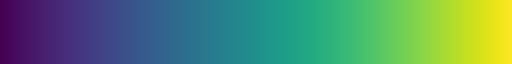

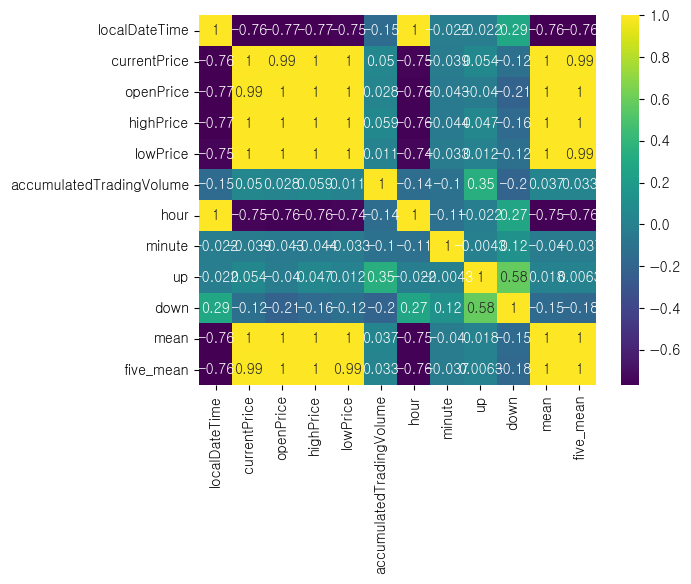

In [33]:
sns.heatmap(df.corr(), cmap=plt.get_cmap(), annot=True)
plt.get_cmap()